(1414, 2119, 3)


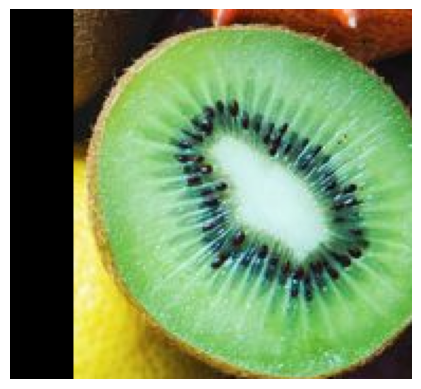

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh từ thư mục exercise
data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

# Cắt vùng ảnh từ tọa độ y: 680-855, x: 1390-1580
bmg = data[680:855, 1390:1580]

# In kích thước ảnh gốc
print(data.shape)

# Tịnh tiến ảnh đã cắt sang phải 30px (trục x), không dịch theo y (0)

shifted_bmg = nd.shift(bmg, shift=(0, 30, 0))  

# Lưu ảnh đã tịnh tiến
iio.imsave('exercise/kiwi_shifted.jpg', shifted_bmg)

# Hiển thị ảnh đã tịnh tiến
plt.imshow(shifted_bmg.astype(np.uint8))  # Đảm bảo kiểu dữ liệu để hiển thị đúng
plt.axis('off')
plt.show()


Original image shape: (1414, 2119, 3)


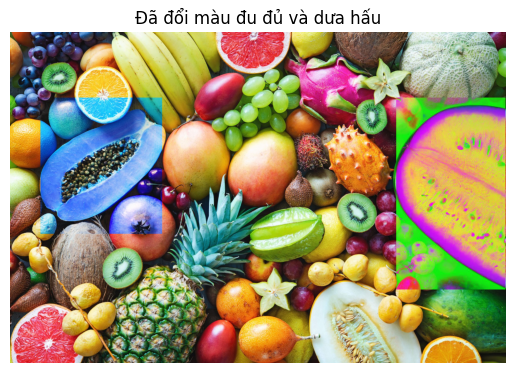

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh từ thư mục exercise
data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
print("Original image shape:", data.shape)

# Cắt vùng chứa quả đu đủ (ví dụ)
papaya = data[280:862, 130:650]  # điều chỉnh tọa độ theo thực tế

# Cắt vùng chứa quả dưa hấu (ví dụ)
watermelon = data[280:1100, 1650:2117]

# Đổi màu: đảo kênh màu RGB → BGR (ví dụ đổi màu nhẹ nhàng)
papaya_changed = papaya[:, :, [2, 1, 0]]  # đu đủ
watermelon_changed = watermelon.copy()
watermelon_changed[:, :, 1] = 255 - watermelon_changed[:, :, 1]  # đảo kênh G

# Gắn trở lại ảnh gốc
data[280:862, 130:650] = papaya_changed
data[280:1100, 1650:2117] = watermelon_changed

# Lưu ảnh sau khi chỉnh màu
iio.imsave('exercise/fruits_changed.jpg', data)

# Hiển thị kết quả
plt.imshow(data)
plt.axis('off')
plt.title("Đã đổi màu đu đủ và dưa hấu")
plt.show()



Kích thước ảnh gốc: (605, 1021, 3)


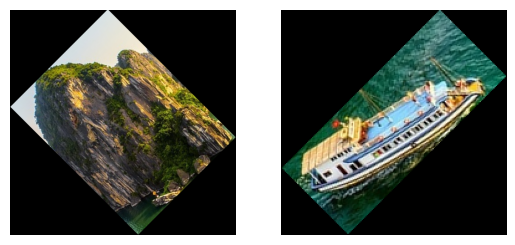

In [3]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt

# Đọc ảnh từ thư mục exercise
data = iio.imread('exercise/quang_ninh.jpg')
print("Kích thước ảnh gốc:", data.shape)

# ---------------------------
# Cắt vùng NGỌN NÚI (ví dụ)
mountain = data[26:324, 432:660]  # Điều chỉnh tọa độ tùy ảnh thực tế
# Xoay 45 độ
mountain_rotated = nd.rotate(mountain, angle=45, reshape=True)
# Lưu ảnh đã xoay
iio.imwrite('exercise/nui_xoay.jpg', mountain_rotated)

# ---------------------------
# Cắt vùng CON THUYỀN (ví dụ)
boat = data[460:536, 490:671]  # Điều chỉnh tọa độ tùy ảnh thực tế
# Xoay 45 độ
boat_rotated = nd.rotate(boat, angle=45, reshape=True)
# Lưu ảnh đã xoay
iio.imwrite('exercise/thuyen_xoay.jpg', boat_rotated)

# ---------------------------
# Hiển thị kết quả
plt.subplot(1, 2, 1)
plt.imshow(mountain_rotated.astype(np.uint8))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(boat_rotated.astype(np.uint8))
plt.axis("off")

plt.show()


Kích thước ảnh gốc: (348, 600, 3)


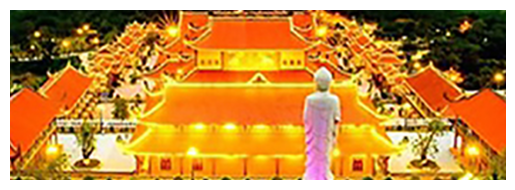

In [6]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt

# Bước 1: Đọc ảnh
data = iio.imread('exercise/pagoda.jpg')
print("Kích thước ảnh gốc:", data.shape)

# Bước 2: Cắt vùng ngôi chùa (tọa độ ví dụ, anh điều chỉnh theo thực tế)
pagoda = data[134:254, 100:450]  # (chiều cao, chiều rộng)

# Bước 3: Phóng to ngôi chùa lên 5 lần
pagoda_resized = nd.zoom(pagoda, zoom=(5, 5, 1))  # zoom theo (y, x, màu)

# Bước 4: Lưu ảnh phóng to
iio.imwrite('exercise/chua_zoomed.jpg', pagoda_resized.astype(np.uint8))

# Bước 5: Hiển thị để kiểm tra
plt.imshow(pagoda_resized)
plt.axis('off')
plt.show()


=== MENU ===
T: Tịnh tiến
X: Xoay
P: Phóng to
H: Thu nhỏ
C: Coordinate Map


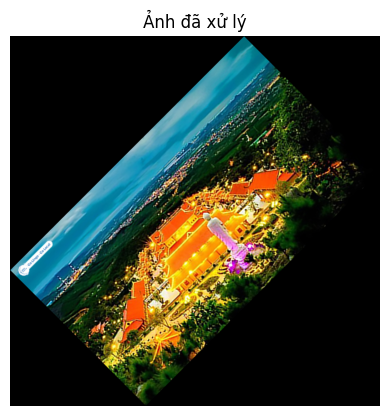

Đã lưu kết quả vào: exercise/anhdaxuly_pagoda.jpg


In [10]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt

# Hàm hiển thị ảnh
def show_image(img, title='Kết quả'):
    plt.imshow(img.astype(np.uint8))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Hàm đọc ảnh
def load_image(filename):
    try:
        return iio.imread(f'exercise/{filename}')
    except:
        print("Không tìm thấy file.")
        return None

# Tịnh tiến ảnh
def translate_image(img):
    dx = int(input("Nhập số pixel tịnh tiến theo trục X: "))
    dy = int(input("Nhập số pixel tịnh tiến theo trục Y: "))
    return nd.shift(img, shift=(dy, dx, 0))

# Xoay ảnh
def rotate_image(img):
    angle = float(input("Nhập góc xoay (độ): "))
    return nd.rotate(img, angle, reshape=True)

# Phóng to ảnh
def zoom_in(img):
    factor = float(input("Nhập hệ số phóng to: "))
    return nd.zoom(img, zoom=(factor, factor, 1))

# Thu nhỏ ảnh
def zoom_out(img):
    factor = float(input("Nhập hệ số thu nhỏ (ví dụ 0.5): "))
    return nd.zoom(img, zoom=(factor, factor, 1))

# In tọa độ pixel (coordinate map)
def coordinate_map(img):
    print("Kích thước ảnh:", img.shape)
    plt.imshow(img)
    plt.title("Coordinate Map - Di chuột để xem pixel")
    plt.axis('on')
    plt.show()

# MAIN MENU
def main():
    print("=== MENU ===")
    print("T: Tịnh tiến")
    print("X: Xoay")
    print("P: Phóng to")
    print("H: Thu nhỏ")
    print("C: Coordinate Map")
    
    choice = input("Chọn thao tác (T/X/P/H/C): ").strip().upper()
    
    if choice not in ['T', 'X', 'P', 'H', 'C']:
        print("Lựa chọn không hợp lệ.")
        return

    filename = input("Nhập tên ảnh muốn xử lý (VD: fruit.jpg): ").strip()
    img = load_image(filename)
    if img is None:
        return

    if choice == 'T':
        result = translate_image(img)
    elif choice == 'X':
        result = rotate_image(img)
    elif choice == 'P':
        result = zoom_in(img)
    elif choice == 'H':
        result = zoom_out(img)
    elif choice == 'C':
        coordinate_map(img)
        return
    else:
        print("Lỗi không xác định.")
        return

    # Hiển thị và lưu kết quả
    show_image(result, "Ảnh đã xử lý")
    save_name = f"exercise/anhdaxuly_{filename}"
    iio.imwrite(save_name, result.astype(np.uint8))
    print(f"Đã lưu kết quả vào: {save_name}")

# Chạy chương trình
main()

